In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm, binom
from scipy.stats import poisson
import seaborn as sns
import env
np.random.seed(123)


In [4]:
import scipy

In [128]:
alpha = 0.05

AttributeError: 'Line2D' object has no property 'lable'

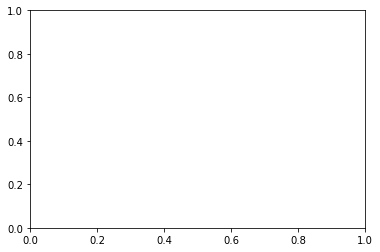

In [131]:
x = np.arange(50, 150)

y1 = stats.norm(90,15).pdf(x)
y2 = stats.norm(100, 20).pdf(x)


plt.plot(x, y1, lable = "office 1")
plt.plot(x, y2, lable = "office 2")

plt.legend()

In [5]:
# sample 1
mean1 = 45
sdev1 = 1.9
ssize1 = 1115

#sample 2
mean2 = 49
sdev2 = 1.9
ssize2 = 1005

In [6]:
t, p = scipy.stats.ttest_ind_from_stats(mean1, sdev1, ssize1, mean2, sdev2, ssize2, equal_var=True )

In [7]:
t, p 

(-48.40151153554419, 0.0)

In [132]:
# sample 1
mean1n = 90
sdev1n = 15
ssize1n = 40

#sample 2
mean2n = 100
sdev2n = 20
ssize2n = 50

In [136]:
t, p = scipy.stats.ttest_ind_from_stats(mean1n, sdev1n, ssize1n, mean2n, sdev2n, ssize2n, equal_var=False )



In [137]:
t

-2.7091418459143854

In [138]:
p

0.00811206270346016

In [12]:
from pydataset import data
mpg = data('mpg')

In [13]:
# Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

mpg.year.unique()


array([1999, 2008])

<AxesSubplot:>

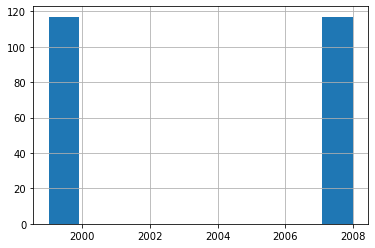

In [14]:
mpg.year.hist()


In [15]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [16]:
mpg = mpg.rename(columns={'cty': 'city'})

mpg = mpg.rename(columns={'hwy': 'highway'})

mpg = mpg.rename(columns={'cyl': 'cylinder'})

In [17]:
mpg

,manufacturer,model,displ,year,cylinder,trans,drv,city,highway,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [50]:
mpg['mileage_difference'] = mpg.city - mpg.highway

mpg

,manufacturer,model,displ,year,cylinder,trans,drv,city,highway,fl,class,mileage_difference,average_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,-11,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,-8,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,-11,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,-9,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,-10,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,-9,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,-8,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,-10,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,-8,22.0


In [51]:
mpg.sort_values('mileage_difference')

,manufacturer,model,displ,year,cylinder,trans,drv,city,highway,fl,class,mileage_difference,average_mileage
223,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,-12,35.0
107,honda,civic,1.8,2008,4,auto(l5),f,24,36,c,subcompact,-12,30.0
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,-11,23.5
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,-11,25.5
229,volkswagen,passat,1.8,1999,4,auto(l5),f,18,29,p,midsize,-11,23.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,ford,f150 pickup 4wd,4.6,1999,8,auto(l4),4,13,16,r,pickup,-3,14.5
127,jeep,grand cherokee 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv,-3,10.5
152,nissan,pathfinder 4wd,3.3,1999,6,manual(m5),4,15,17,r,suv,-2,16.0
177,toyota,4runner 4wd,3.4,1999,6,manual(m5),4,15,17,r,suv,-2,16.0


In [53]:
mpg['average_mileage'] = (mpg['highway'] + mpg['city'])/2

In [54]:
mpg = mpg[~mpg['mileage_difference'].isna()]


In [55]:
mpg

,manufacturer,model,displ,year,cylinder,trans,drv,city,highway,fl,class,mileage_difference,average_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,-11,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,-8,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,-11,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,-9,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,-10,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,-9,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,-8,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,-10,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,-8,22.0


In [68]:
mpg.average_mileage.mean()

20.14957264957265

In [57]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   manufacturer        234 non-null    object 
 1   model               234 non-null    object 
 2   displ               234 non-null    float64
 3   year                234 non-null    int64  
 4   cylinder            234 non-null    int64  
 5   trans               234 non-null    object 
 6   drv                 234 non-null    object 
 7   city                234 non-null    int64  
 8   highway             234 non-null    int64  
 9   fl                  234 non-null    object 
 10  class               234 non-null    object 
 11  mileage_difference  234 non-null    int64  
 12  average_mileage     234 non-null    float64
dtypes: float64(2), int64(5), object(6)
memory usage: 25.6+ KB


In [81]:
mpg.value_counts('year')

year
1999    117
2008    117
dtype: int64

In [82]:
fuel_2008 = mpg[mpg.year == 2008].average_mileage

In [83]:
fuel_1999 = mpg[mpg.year == 1999].average_mileage

In [84]:
fuel_2008.var()

24.097480106100797

<AxesSubplot:>

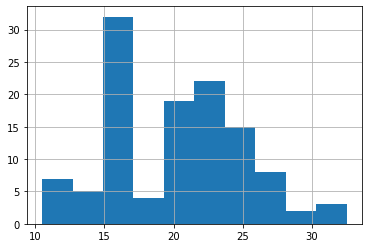

In [139]:
fuel_2008.hist()

In [145]:
fuel_1999.var(), fuel_2008.var()

(27.122605363984682, 24.097480106100797)

<AxesSubplot:>

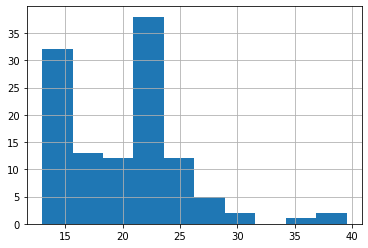

In [141]:
fuel_1999.hist()

In [146]:
stat, pval = stats.levene(fuel_2008, fuel_1999)

In [151]:
if pval < 0.05:
    print('we can reject the H0 that the two samples have equal variance')
else:
    print('failed to reject null')

failed to reject null


In [152]:
pval

0.855517569468803

In [153]:
alpha = 0.05

In [154]:
t, p = stats.ttest_ind(fuel_2008, fuel_1999, equal_var=True)

t, p, alpha



(-0.21960177245940962, 0.8263744040323578, 0.05)

In [155]:
fuel_2008.mean(), fuel_1999.mean()

(20.076923076923077, 20.22222222222222)

In [156]:
plt.hist[fuel_2008, fuel_1999], lable[]

SyntaxError: invalid syntax (146087627.py, line 1)

In [109]:
# Are compact cars more fuel-efficient than the average car?

mpg.value_counts('class')

class
suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
dtype: int64

In [123]:
# Are compact cars more fuel-efficient than the average car?

mpg.groupby('class').average_mileage.mean().sort_values(ascending = False)




class
subcompact    24.257143
compact       24.212766
midsize       23.024390
2seater       20.100000
minivan       19.090909
suv           15.814516
pickup        14.939394
Name: average_mileage, dtype: float64

<AxesSubplot:>

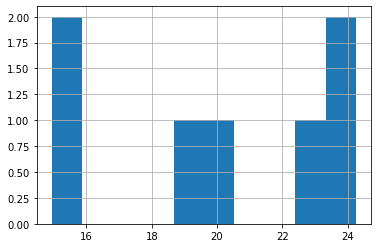

In [124]:

mpg.groupby('class').average_mileage.mean().sort_values(ascending = False).hist()

In [162]:
fe_compact = mpg[mpg['class'] == 'compact'].average_mileage

pop_mean = mpg.average_mileage.mean()

<AxesSubplot:>

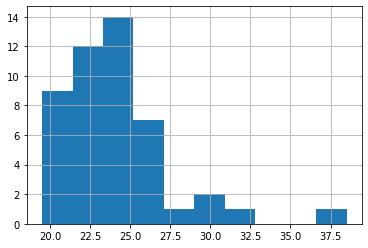

In [163]:
fe_compact.hist()

In [165]:
t, p = stats.ttest_1samp(fe_compact, pop_mean)

t, p, alpha

(7.896888573132535, 4.1985637943171336e-10, 0.05)

In [166]:
if (p/2 < alpha) and t > 0:
   print('reject')

reject


In [167]:
# Do manual cars get better gas mileage than automatic cars?

mpg.trans.value_counts()

auto(l4)      83
manual(m5)    58
auto(l5)      39
manual(m6)    19
auto(s6)      16
auto(l6)       6
auto(av)       5
auto(s5)       3
auto(s4)       3
auto(l3)       2
Name: trans, dtype: int64

In [170]:
fe_auto = mpg[mpg.trans.str.contains('auto')].average_mileage
fe_manual = mpg[mpg.trans.str.contains('manual')].average_mileage

In [171]:
stats.levene(fe_auto,fe_manual )

LeveneResult(statistic=0.20075824847529639, pvalue=0.6545276355131857)

In [172]:
fe_auto.var(), fe_manual.var()

(21.942777233382337, 26.635167464114826)

In [173]:
t, p = stats.ttest_ind(fe_manual, fe_auto, equal_var = True)

t, p/2, alpha

(4.593437735750014, 3.5771872005728416e-06, 0.05)

In [174]:
fe_auto.mean(), fe_manual.mean()

(19.130573248407643, 22.227272727272727)